# World Happiness Project

In [344]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as stats

import warnings
warnings.filterwarnings("ignore")

In [345]:
#Loading the data
wh=pd.read_csv("worldhappiness.csv")
wh

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


#Observation:
    The dataset contains 158 rows with 12 independent features(age, sex, bmi, children, smoker, region) and 1 target  
    feature(charges)

In [346]:
wh.keys()

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [347]:
wh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [348]:
wh.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

#Observation: There is one integer dtypes, nine float dtypes and two object dtypes

In [349]:
wh.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


Finland ranks first with a score of 79.494.
Switzerland has the highest GDP per capita at 1.690.
Denmark ranks highest in family with a score of 1.402.
Singapore ranks highest in Health (Life Expectancy) with a score of 1.025.
New Zealand ranks highest in Freedom with a score of 0.552.
Finland ranks highest in Trust (Government Corruption) with a score of 0.328.
Denmark ranks highest in Generosity with a score of 0.981.
Finland ranks lowest in Dystopia Index with a score of 2.099

In [350]:
wh.shape

(158, 12)

In [351]:
wh.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [352]:
wh.tail()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


# Expolratory Data Analysis

In [353]:
#Checking the 'Nan' values
wh.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

There are no null values in this dataset. Thus all of the data points have values for each of the 12 features

<Axes: >

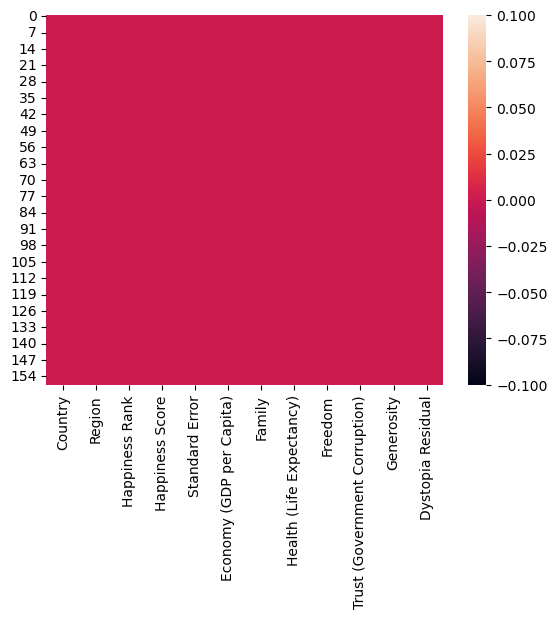

In [354]:
sns.heatmap(wh.isnull())

In [355]:
wh.skew()

Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

Observations:

Happiness Rank shows the rank a country receives based on its happiness score.
Happiness Score shows a score between 0 and 10, indicating a country's average level of happiness.
Standard Error shows the standard error of the happiness score.
Economy (GDP per Capita) shows a country's Gross Domestic Product (GDP) per capita.
Family: This column includes a data point related to family.
Health (Life Expectancy): This column shows a country's average life expectancy.
Freedom: This column includes a data point related to freedom.
Trust (Government Corruption): This column shows a data point related to trust in government and the level of corruption.
Generosity: This column includes a data point related to generosity.
Dystopia Residual: This column includes a data point labeled "Dystopia Residual".

<Axes: xlabel='Happiness Rank', ylabel='Density'>

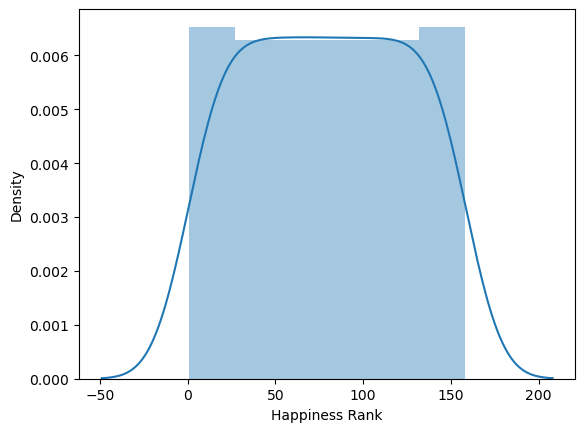

In [356]:
sns.distplot(wh['Happiness Rank'])

The graph shows a density curve, with a peak at around 0.002 that means most people have a happiness rank of around 0.002.

<Axes: xlabel='Happiness Score', ylabel='Density'>

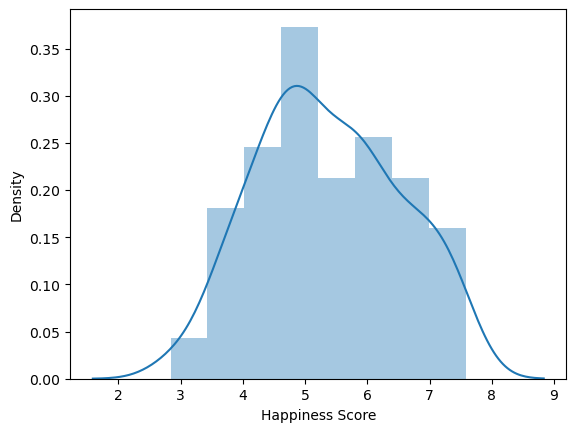

In [357]:
sns.distplot(wh['Happiness Score'])

The base of the pyramid is wide, which means there are many people with scores around the middle of the range (between 0.10 and 0.25).

<Axes: xlabel='Standard Error', ylabel='Density'>

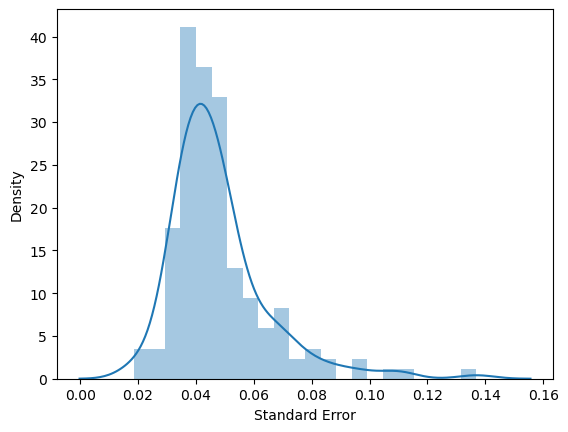

In [358]:
sns.distplot(wh['Standard Error'])

The bell-shaped curve indicates that most values fall around the average standard error, with fewer values falling further away on either side.

<Axes: xlabel='Economy (GDP per Capita)', ylabel='Density'>

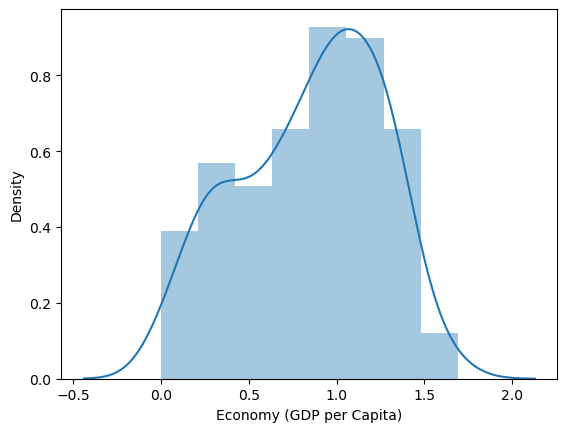

In [359]:
sns.distplot(wh['Economy (GDP per Capita)'])

The density curve suggests the economy might have grown at a gradually increasing rate and then reached a plateau

<Axes: xlabel='Family', ylabel='Density'>

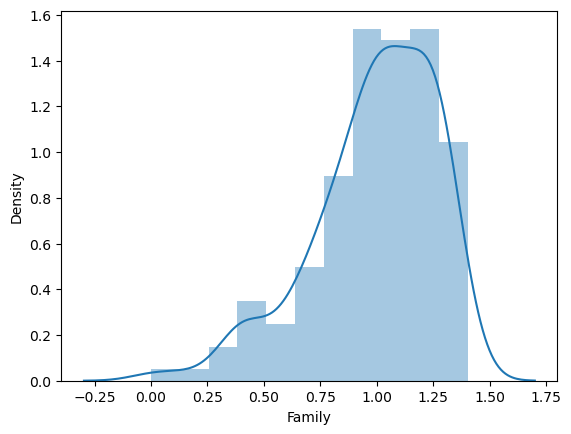

In [360]:
sns.distplot(wh['Family'])

There are more families concentrated in the lower income brackets compared to the higher brackets.

<Axes: xlabel='Health (Life Expectancy)', ylabel='Density'>

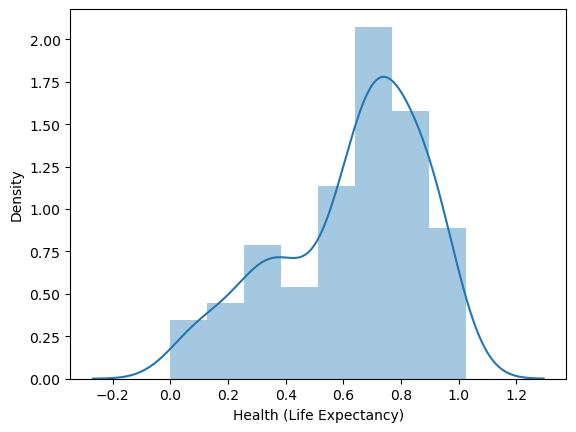

In [361]:
sns.distplot(wh['Health (Life Expectancy)'])

Most people in the dataset have life expectancies around the average, with fewer people falling outside this range. 

<Axes: xlabel='Freedom', ylabel='Density'>

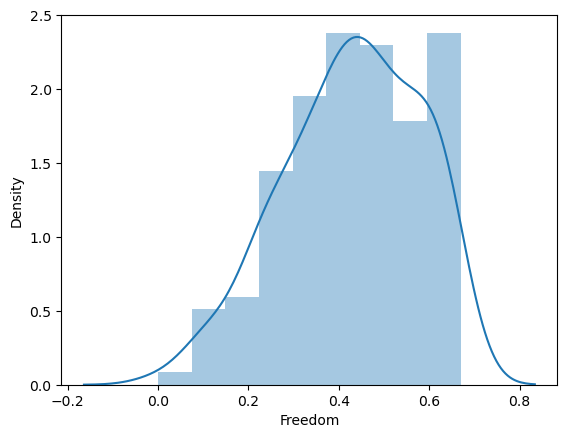

In [362]:
sns.distplot(wh['Freedom'])

A density curve with a peak at around 0.0, indicating that most scores fall around this value.

<Axes: xlabel='Trust (Government Corruption)', ylabel='Density'>

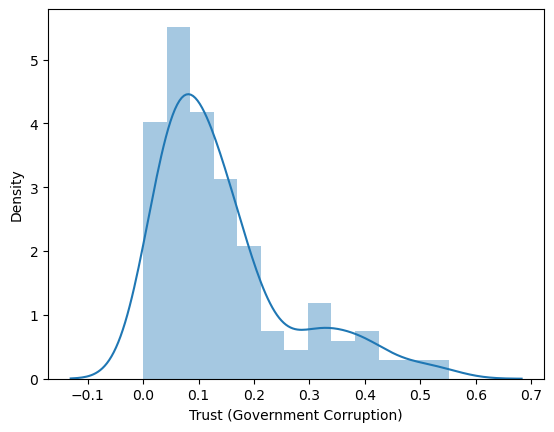

In [363]:
sns.distplot(wh['Trust (Government Corruption)'])

Most people in the dataset have a somewhat low level of trust in the government regarding corruption.

<Axes: xlabel='Generosity', ylabel='Density'>

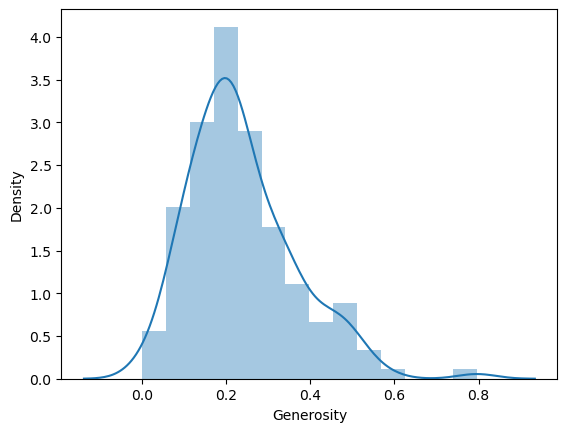

In [364]:
sns.distplot(wh['Generosity'])

There are more people with lower generosity scores than people with higher generosity scores.

<Axes: xlabel='Dystopia Residual', ylabel='Density'>

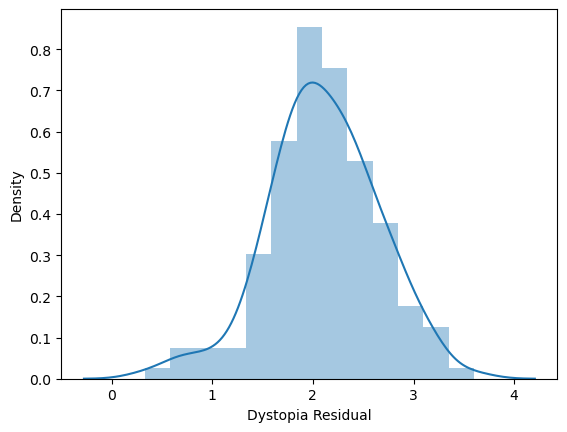

In [365]:
sns.distplot(wh['Dystopia Residual'])

 Most common dystopia residual scores are around 0.2. Scores much lower or much higher than 0.2 are less common.

# Visualization

<Axes: xlabel='Happiness Rank', ylabel='Happiness Score'>

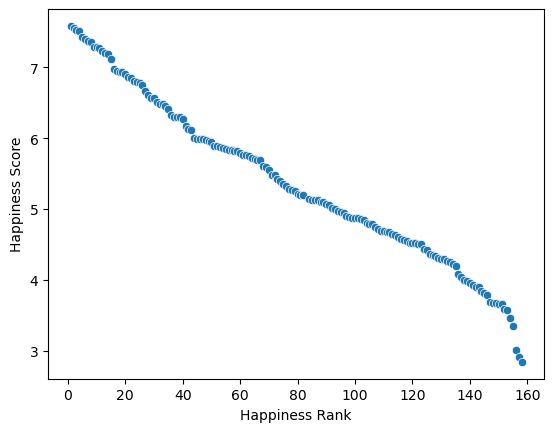

In [366]:
sns.scatterplot(data=wh, x='Happiness Rank', y='Happiness Score')

<Axes: xlabel='Standard Error', ylabel='Happiness Score'>

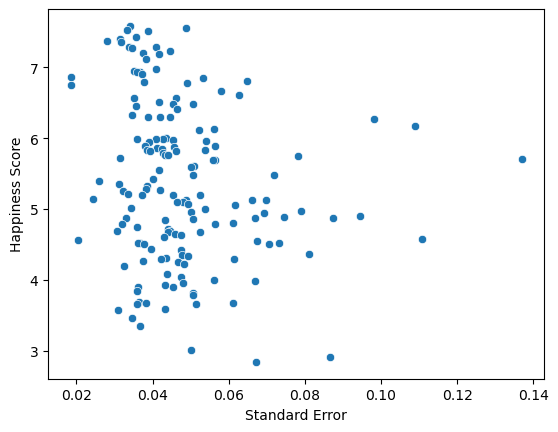

In [367]:
sns.scatterplot(data=wh, x='Standard Error', y='Happiness Score')

<Axes: xlabel='Economy (GDP per Capita)', ylabel='Happiness Score'>

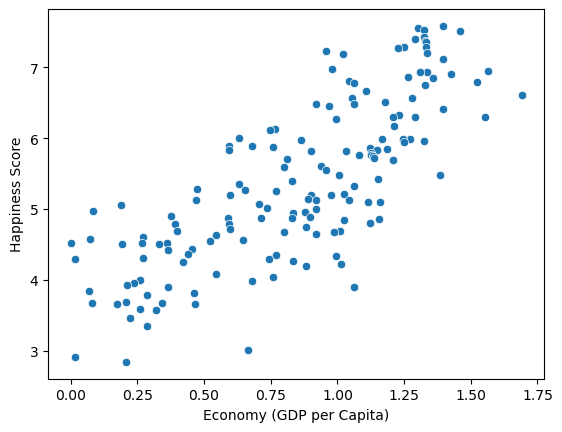

In [368]:
sns.scatterplot(data=wh, x='Economy (GDP per Capita)', y='Happiness Score')

<Axes: xlabel='Family', ylabel='Happiness Score'>

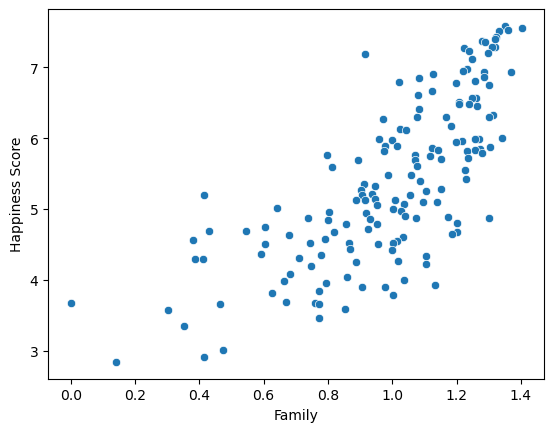

In [369]:
sns.scatterplot(data=wh, x='Family', y='Happiness Score')

<Axes: xlabel='Health (Life Expectancy)', ylabel='Happiness Score'>

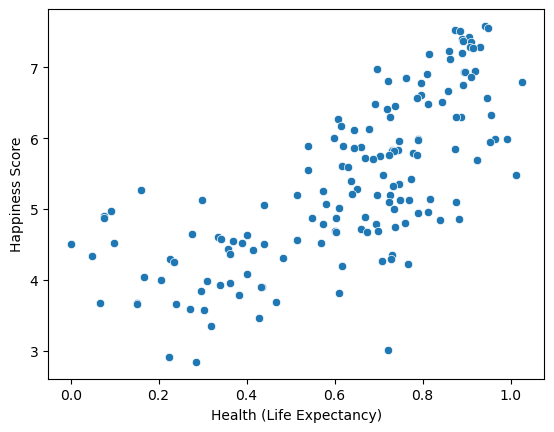

In [370]:
sns.scatterplot(data=wh, x='Health (Life Expectancy)', y='Happiness Score')

<Axes: xlabel='Freedom', ylabel='Happiness Score'>

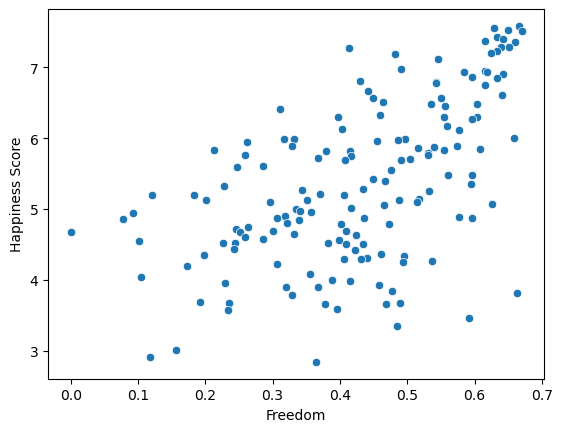

In [371]:
sns.scatterplot(data=wh, x='Freedom', y='Happiness Score')

<Axes: xlabel='Trust (Government Corruption)', ylabel='Happiness Score'>

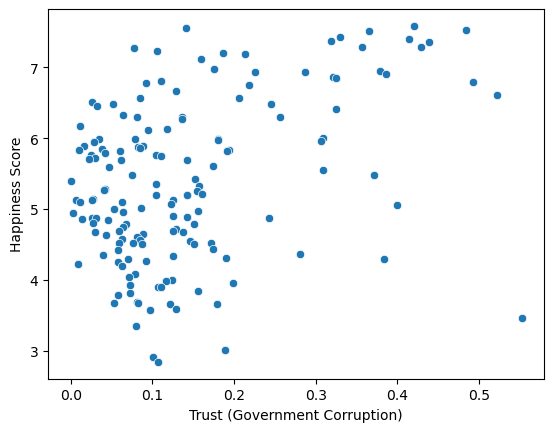

In [372]:
sns.scatterplot(data=wh, x='Trust (Government Corruption)', y='Happiness Score')

<Axes: xlabel='Generosity', ylabel='Happiness Score'>

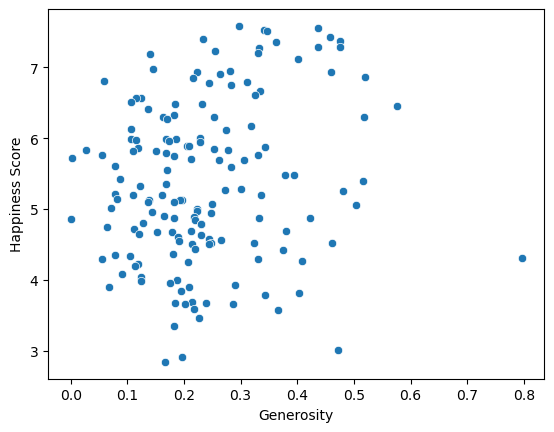

In [373]:
sns.scatterplot(data=wh, x='Generosity', y='Happiness Score')

<Axes: xlabel='Dystopia Residual', ylabel='Happiness Score'>

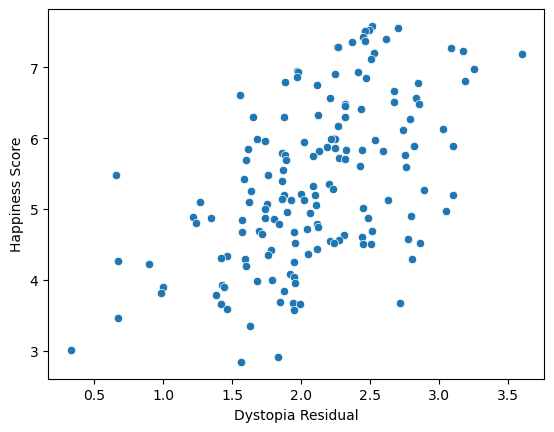

In [374]:
sns.scatterplot(data=wh, x='Dystopia Residual', y='Happiness Score')

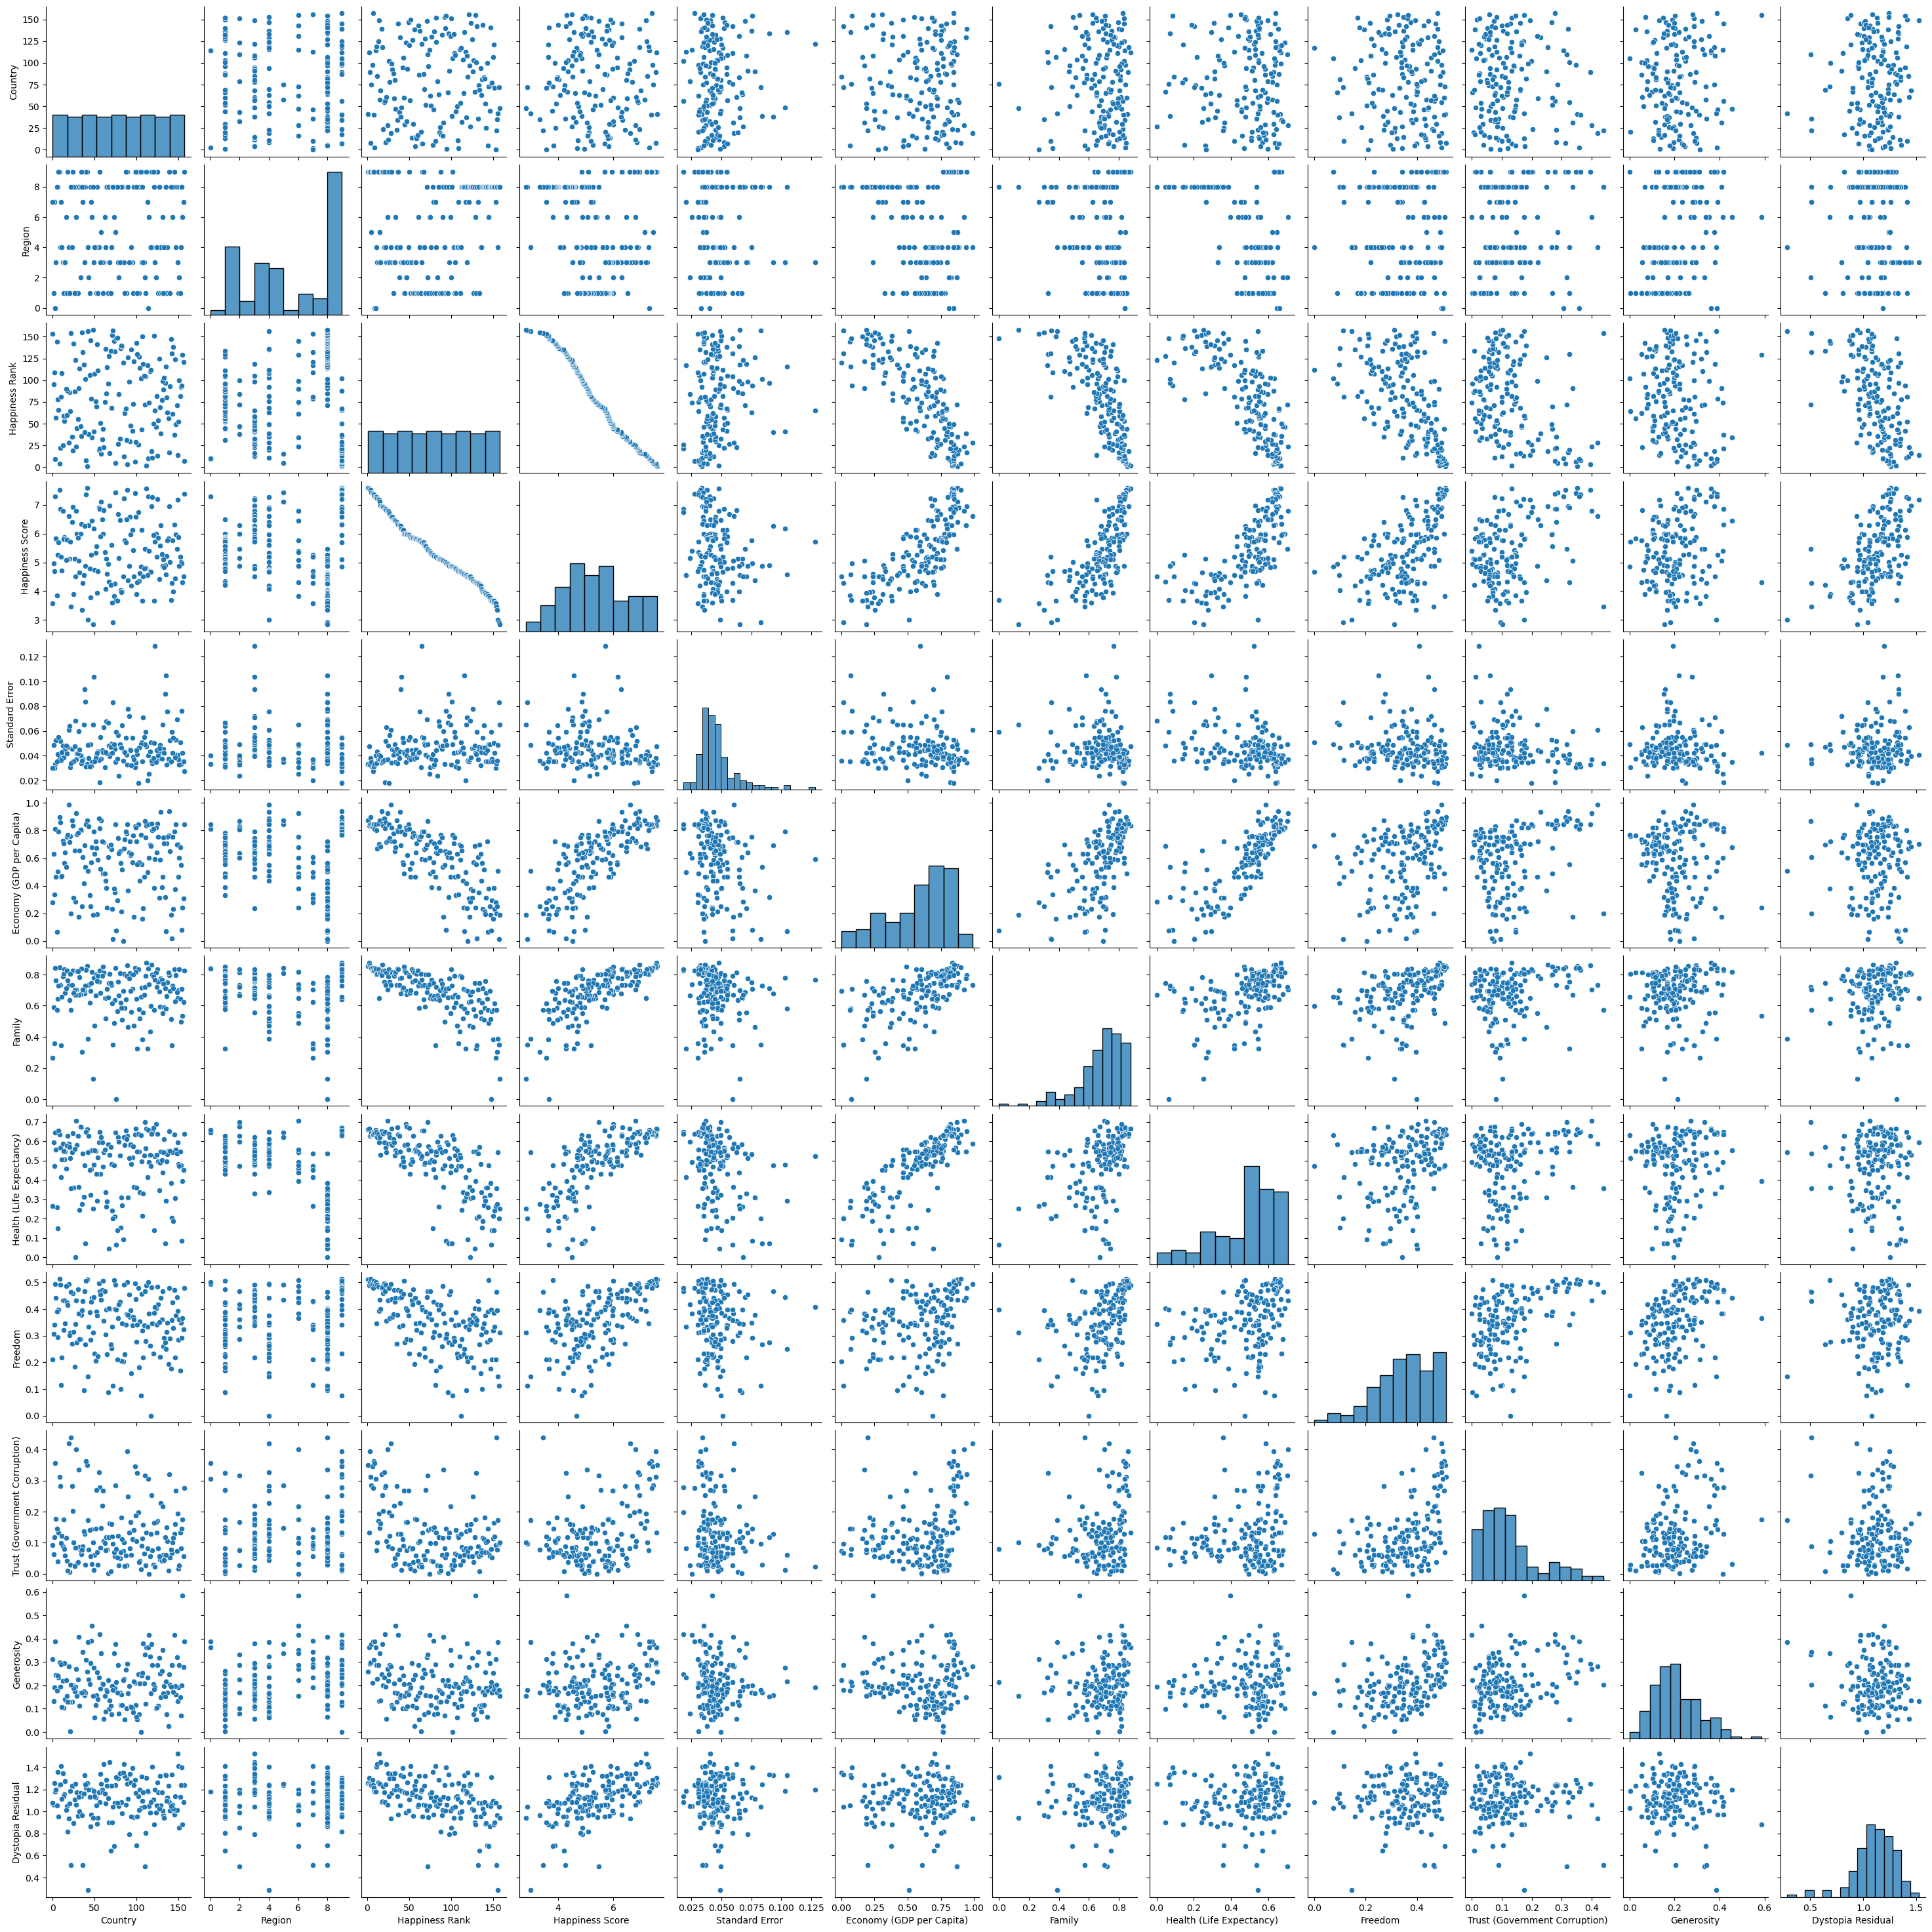

In [400]:
sns.pairplot(wh)

In [401]:
#Checking the correlation
wh.corr()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,1.000000,0.007604,0.032829,-0.020494,0.073453,-0.037538,-0.008280,-0.010394,-0.084768,-0.095539,0.050944,0.034686
Region,0.007604,1.000000,0.213773,-0.176791,-0.023913,-0.302805,-0.179020,-0.383429,0.085423,0.172181,0.284052,-0.046856
Happiness Rank,0.032829,0.213773,1.000000,-0.992105,0.161007,-0.768148,-0.703570,-0.713878,-0.542466,-0.369656,-0.162332,-0.514969
Happiness Score,-0.020494,-0.176791,-0.992105,1.000000,-0.179857,0.762306,0.712098,0.700958,0.553080,0.392308,0.182488,0.524429
Standard Error,0.073453,-0.023913,0.161007,-0.179857,1.000000,-0.218462,-0.107967,-0.311947,-0.130028,-0.178278,-0.079647,0.072595
Economy (GDP per Capita),-0.037538,-0.302805,-0.768148,0.762306,-0.218462,1.000000,0.625438,0.797841,0.330470,0.247677,-0.043911,0.039105
Family,-0.008280,-0.179020,-0.703570,0.712098,-0.107967,0.625438,1.000000,0.498648,0.395711,0.180777,0.068921,0.140500
Health (Life Expectancy),-0.010394,-0.383429,-0.713878,0.700958,-0.311947,0.797841,0.498648,1.000000,0.330428,0.224330,0.096093,0.003624
Freedom,-0.084768,0.085423,-0.542466,0.553080,-0.130028,0.330470,0.395711,0.330428,1.000000,0.472137,0.370507,0.057930
Trust (Government Corruption),-0.095539,0.172181,-0.369656,0.392308,-0.178278,0.247677,0.180777,0.224330,0.472137,1.000000,0.279950,-0.035058


<Axes: >

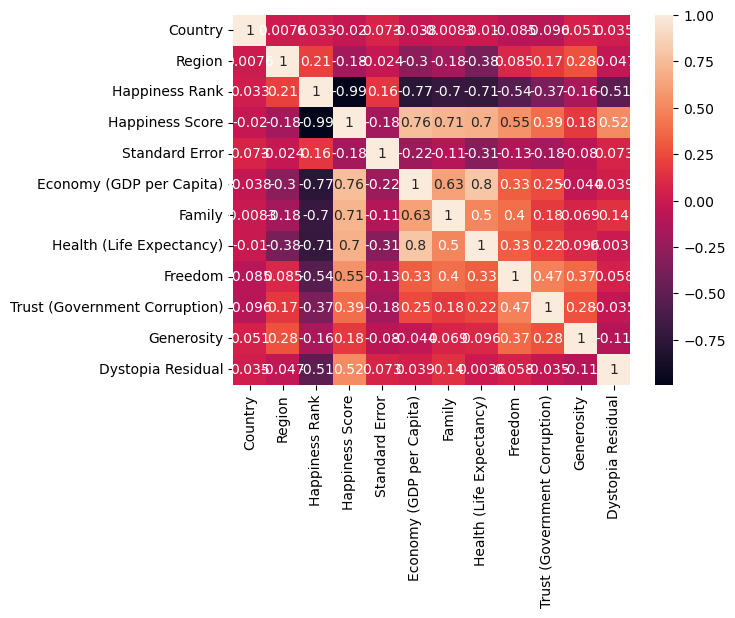

In [402]:
sns.heatmap(wh.corr(),annot=True)

Observation:
    There is a positive correlation among happiness rating and GDP in step with capita, own family, health, believe, generosity, and freedom. It shows that nations with higher rankings in those regions have a tendency to have better happiness ratings.
There is a negative correlation between happiness score and dystopia residual.Dystopia residual rankings have a tendency to have lower happiness ratings.

# Data Preprocessing

In [378]:
from scipy.stats import skew
numerical_features = ['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Dystopia Residual']
skewed_features = ['Standard Error', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
                   'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']
for feature in skewed_features:
    wh[feature] = np.log1p(wh[feature])
    

skewness_after_transformation = wh[skewed_features].apply(lambda x: skew(x))
print("Skewness after transformation:")
print(skewness_after_transformation)

Skewness after transformation:
Standard Error                   1.872611
Economy (GDP per Capita)        -0.674399
Family                          -1.502699
Health (Life Expectancy)        -0.975359
Freedom                         -0.646039
Trust (Government Corruption)    1.169681
Generosity                       0.644572
Dystopia Residual               -1.063773
dtype: float64


In [379]:
#Encoding
from sklearn import preprocessing 

le = preprocessing.LabelEncoder() 
wh['Country']=le.fit_transform(wh['Country'])
list1=['Country','Region']
for val in list1:
    wh[val]=le.fit_transform(wh[val].astype(str))
wh

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,41,9,1,7.587,0.033541,0.874014,0.854207,0.663425,0.510167,0.350502,0.259884,1.257716
1,112,9,2,7.561,0.047685,0.833917,0.876397,0.666721,0.487825,0.132299,0.362070,1.308876
2,89,9,3,7.527,0.032738,0.843926,0.858907,0.628417,0.500399,0.394451,0.293706,1.250486
3,8,9,4,7.522,0.038066,0.899755,0.846276,0.634039,0.512662,0.311176,0.297872,1.242802
4,75,5,5,7.427,0.034913,0.844275,0.842692,0.644813,0.490400,0.284856,0.377141,1.238884
...,...,...,...,...,...,...,...,...,...,...,...,...
153,22,8,154,3.465,0.034054,0.200554,0.573068,0.356723,0.464997,0.439486,0.203985,0.513075
154,35,8,155,3.340,0.035908,0.252042,0.302960,0.276950,0.395078,0.077054,0.167715,0.968230
155,42,4,156,3.006,0.048933,0.508743,0.388583,0.543446,0.145692,0.173163,0.386479,0.284111
156,72,8,157,2.905,0.083035,0.015184,0.347744,0.202092,0.111989,0.095874,0.180044,1.041343


# Train and Test

In [380]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings ('ignore')

In [381]:
x = wh[['Country','Region','Happiness Rank','Standard Error','Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)','Generosity','Dystopia Residual']]
y = wh['Happiness Score']


In [382]:
x.shape

(158, 11)

In [383]:
y.shape

(158,)

In [384]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [385]:
xtrain.shape

(126, 11)

In [386]:
xtest.shape

(32, 11)

In [387]:
ytrain.shape

(126,)

In [388]:
ytest.shape

(32,)

In [389]:
lm=LinearRegression()
lm.fit(xtrain,ytrain)

LinearRegression()

In [390]:
from sklearn.preprocessing import MinMaxScaler
st=MinMaxScaler()
x=st.fit_transform(x)
x

array([[0.2611465 , 1.        , 0.        , ..., 0.79752617, 0.44387091,
        0.78364238],
       [0.7133758 , 1.        , 0.00636943, ..., 0.30103178, 0.61840027,
        0.82482001],
       [0.56687898, 1.        , 0.01273885, ..., 0.89752793, 0.50163761,
        0.77782281],
       ...,
       [0.26751592, 0.44444444, 0.98726115, ..., 0.39401234, 0.66008975,
        0.        ],
       [0.45859873, 0.88888889, 0.99363057, ..., 0.2181493 , 0.30750718,
        0.60948652],
       [0.30573248, 0.88888889, 1.        , ..., 0.23193811, 0.26349241,
        0.53020187]])

In [391]:
lm.coef_

array([ 8.95341598e-05,  7.34238319e-03, -1.04455923e-02,  6.59878810e-02,
        9.67480204e-01,  1.03549906e+00,  9.00508039e-01,  7.56308151e-01,
        1.05933550e+00,  8.80160222e-01,  1.68088430e+00])

In [392]:
lm.intercept_

2.00666425406802

In [393]:
lm.score(xtrain,ytrain)

0.9947297747459267

In [403]:
#Predicting the Happiness Score
pred=lm.predict(xtest)
print("Predicted Happiness Score:",pred)
print("Actual Happiness Score",ytest)

Predicted Happiness Score: [4.32142234 6.04065231 4.14396409 3.08924054 5.21973606 6.50688398
 4.8936485  5.03454737 4.95338506 3.90689016 6.91398953 5.9327651
 6.86851057 5.6469701  6.69520079 6.41945901 4.38828109 4.71110508
 4.89324148 5.7495551  3.70173777 6.92488236 7.12799123 7.2044997
 6.54979627 5.3065618  5.87085868 4.01709589 4.44622685 3.74958949
 3.79327534 5.43878539]
Actual Happiness Score 128    4.307
45     5.987
134    4.194
156    2.905
90     5.057
29     6.574
96     4.898
98     4.876
95     4.949
140    3.931
19     6.901
56     5.828
15     6.983
69     5.548
24     6.786
30     6.505
122    4.507
109    4.686
93     4.971
65     5.695
150    3.655
18     6.937
12     7.200
9      7.284
31     6.485
81     5.192
51     5.889
139    3.956
125    4.369
146    3.681
145    3.781
75     5.332
Name: Happiness Score, dtype: float64


In [396]:
print ('Mean Absolute Error:',mean_absolute_error(ytest,pred))
print ('Mean Squared Error:',mean_squared_error(ytest,pred))
print ('Root Mean Squared Error:',np.sqrt(mean_absolute_error(ytest,pred)))

Mean Absolute Error: 0.07003517959097824
Mean Squared Error: 0.007096223789203552
Root Mean Squared Error: 0.26464160593334196


In [397]:
print(cross_val_score(lm,x,y,cv=5,).mean())

0.7765041311377239


In [398]:
from sklearn.metrics import r2_score
print(r2_score(ytest,pred))

0.9949982587252559
